<center><img src="https://www.reuters.com/resizer/9FUE23J5VXLY1j2ebMMz-M4IB7A=/1920x0/filters:quality(80)/cloudfront-us-east-2.images.arcpublishing.com/reuters/ZVX6AX3H6NKYFFGKTGP3NDL6BM.jpg" width="500" height="300"></center>

# Cursos de Series de tiempo con *Machine Learning*
## Modulo . Caso de estudio
                        Elaborado por: Naren Castellon

# **Table of Contents**
1. [Introduction](#1)
2. [Case study](#2)
3. [Explore Data with the plot method](#3)
4. [Split the data into training and testing](#4)
5. [Implementation with StatsForecast](#5)
6. [Evaluate the model](#6)
7. [Exogenous variables](#7)
8. [Splitting training and test data with exogenous variables](#8)
9. [Implementation of StatsForecast with exogenous variables](#9)
10. [Evaluate the model for exogenous variables](#10)
11. [Conclusion](#11)
12. [References](12)

<a id="1"></a> 
# **Introduction**

La modelación de series de tiempo es una herramienta esencial en el análisis y pronóstico de ventas, y su aplicación al contexto del pronóstico de ventas de la marca ADIDAS resulta de gran relevancia. ADIDAS es una reconocida marca global de artículos deportivos, conocida por su amplia gama de productos y su presencia en múltiples mercados.

El pronóstico preciso de las ventas de ADIDAS es fundamental para la planificación estratégica, la gestión de inventario, la toma de decisiones y el logro de los objetivos comerciales. La modelación de series de tiempo permite analizar y predecir los patrones y tendencias inherentes a los datos históricos de ventas, lo que ayuda a identificar los factores clave que influyen en el rendimiento de la marca y a tomar decisiones fundamentadas sobre la producción, distribución y estrategias de marketing.

Al modelar las series de tiempo de las ventas de ADIDAS, se consideran diversos factores y variables, como la estacionalidad en la demanda de productos deportivos, las tendencias a largo plazo, los efectos promocionales, eventos deportivos importantes y otros factores económicos o sociales que pueden afectar las ventas de la marca. Estos factores se capturan mediante la aplicación de modelos de series de tiempo, como los modelos ARIMA, SARIMA, modelos de suavizamiento exponencial o modelos de redes neuronales, entre otros.

La modelación de series de tiempo proporciona una visión profunda del comportamiento pasado de las ventas de ADIDAS y ayuda a predecir las ventas futuras de manera más precisa. Esto permite a la marca ADIDAS tomar decisiones estratégicas, optimizar la producción, planificar campañas de marketing y gestionar eficientemente el inventario en función de las demandas y patrones identificados.

En resumen, la modelación de series de tiempo aplicada al pronóstico de ventas de la marca ADIDAS es una herramienta valiosa para comprender y predecir el rendimiento de la marca en función de los datos históricos. Esto ayuda a ADIDAS a tomar decisiones informadas y estratégicas, mejorando su capacidad para anticipar la demanda del mercado y mantener una ventaja competitiva en la industria de artículos deportivos.

<a id="2"></a>
# **Case study**

En este estudio de caso, exploraremos cómo la modelación de series de tiempo puede aplicarse al pronóstico de ventas de ADIDAS. ADIDAS es una reconocida marca global de artículos deportivos que opera en múltiples mercados y ofrece una amplia gama de productos. El pronóstico preciso de las ventas es esencial para ADIDAS, ya que les permite planificar de manera efectiva la producción, gestionar el inventario y tomar decisiones estratégicas para maximizar los ingresos.

Para llevar a cabo este estudio de caso, utilizaremos un conjunto de datos históricos de ADIDAS. Los datos incluirán información sobre las ventas totales, region, precio unitario de venta, junto con otras variables relevantes que puedan influir en las ventas, como promociones, eventos deportivos, cambios estacionales y factores económicos. El objetivo es utilizar estos datos para construir un modelo de series de tiempo que pueda predecir las ventas futuras de ADIDAS.

We will use different techniques for analysis and forecasting:

1. Data collection.
2. Exploratory data analysis.
3. Data preparation.
4. Model selection.
5. Model adjustment and evaluation.
6. Sales Forecast.

En base al análisis de las series de tiempo de las ventas de ADIDAS y la construcción de modelos adecuados, podemos obtener pronósticos precisos que ayuden a ADIDAS en la toma de decisiones estratégicas. La modelación de series de tiempo proporciona una herramienta poderosa para comprender y predecir las fluctuaciones en las ventas de la marca, así como para identificar patrones estacionales, tendencias a largo plazo y otros factores que influyen en el rendimiento de ADIDAS. Esto permite a la marca anticipar la demanda, ajustar la producción y el inventario, y diseñar estrategias de marketing efectivas para maximizar el rendimiento comercial.

## **Load Library**

In [2]:
# Hide warnings
# ==============================================================================
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Handling and processing of Data
# ==============================================================================
import numpy as np
import pandas as pd

# StatsForecast
# ==============================================================================
from statsforecast import StatsForecast
from utilsforecast.plotting import plot_series



In [2]:
# Plot
# ==============================================================================
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
import plotly.express as px
plt.style.use('ggplot')
plt.rcParams['lines.linewidth'] = 1.5


# Define the plot size
# ==============================================================================
from pylab import rcParams
rcParams['figure.figsize'] = (18,7)

## **About Dataset**

The following data set has the following attributes:

- Retailer: The entity or organization selling Adidas products.
- Retailer ID: A unique identifier for each retailer.
- Invoice Date: The date when the sales transaction occurred.
- Region: The geographical region where the retailer operates.
- State: The state within the region where the retailer is located.
- City: The city where the retailer is situated.
- Product: The Adidas product being sold.
- Price per Unit: The cost of one unit of the Adidas product.
- Units Sold: The number of units of the Adidas product sold in a particular transaction.
- Total Sales: The total revenue generated from the sale of Adidas products in a transaction.
- Operating Profit: The profit earned by the retailer from the sale after deducting operating costs.
- Operating Margin: The percentage of operating profit in relation to total sales.
- Sales Method: The method or channel through which the sales transaction occurred.

In [4]:
df=pd.read_csv("https://raw.githubusercontent.com/Naren8520/Serie-de-tiempo-con-Machine-Learning/main/Data/Adidas%20US%20Sales%20Data.csv",sep=";")
#df.columns = df.iloc[3]
#df = df.iloc[4:,1:].reset_index(drop=True)
df.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,01/01/20,Northeast,New York,New York,Men's Street Footwear,$50.00,"1,200","$600,000","$300,000",50%,In-store
1,Foot Locker,1185732,01/02/20,Northeast,New York,New York,Men's Athletic Footwear,$50.00,"1,000","$500,000","$150,000",30%,In-store
2,Foot Locker,1185732,01/03/20,Northeast,New York,New York,Women's Street Footwear,$40.00,"1,000","$400,000","$140,000",35%,In-store
3,Foot Locker,1185732,01/04/20,Northeast,New York,New York,Women's Athletic Footwear,$45.00,850,"$382,500","$133,875",35%,In-store
4,Foot Locker,1185732,01/05/20,Northeast,New York,New York,Men's Apparel,$60.00,900,"$540,000","$162,000",30%,In-store


In [5]:
# We eliminate the dollar sign and the space from the comma
df['Price per Unit'] = df['Price per Unit'].str.replace('$', '')
df['Total Sales'] = df['Total Sales'].str.replace('$', '').str.replace(',', '')
df['Operating Profit'] = df['Operating Profit'].str.replace('$', '').str.replace(',', '')
df["Units Sold"]=df["Units Sold"].str.replace(',', '')

# Remove the % sign and divide by 100
df['Operating Margin']=df['Operating Margin'].str[:-1].astype(float)
df['Operating Margin'] = df['Operating Margin'] / 100

In [6]:
df['Invoice Date']=pd.to_datetime(df['Invoice Date']) #Changing datatype of Invoice Date to datetime

In [7]:
df[['Price per Unit', 'Units Sold', 'Total Sales','Operating Profit']] = df[['Price per Unit', 'Units Sold', 'Total Sales','Operating Profit']].astype("float")

The input to StatsForecast is always a data frame in long format with three columns: unique_id, ds and y:

* The `unique_id` (string, int or category) represents an identifier for the series.

* The `ds` (datestamp) column should be of a format expected by Pandas, ideally YYYY-MM-DD for a date or YYYY-MM-DD HH:MM:SS for a timestamp.

* The `y` (numeric) represents the measurement we wish to forecast.

In [8]:
df["unique_id"]="1"
df=df.rename(columns={"Invoice Date": "ds", "Total Sales": "y"})
df.head()

,Retailer,Retailer ID,ds,Region,State,City,Product,Price per Unit,Units Sold,y,Operating Profit,Operating Margin,Sales Method,unique_id
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200.0,600000.0,300000.0,0.50,In-store,1
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000.0,500000.0,150000.0,0.30,In-store,1
2,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40.0,1000.0,400000.0,140000.0,0.35,In-store,1
3,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45.0,850.0,382500.0,133875.0,0.35,In-store,1
4,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60.0,900.0,540000.0,162000.0,0.30,In-store,1


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Retailer          9648 non-null   object        
 1   Retailer ID       9648 non-null   int64         
 2   ds                9648 non-null   datetime64[ns]
 3   Region            9648 non-null   object        
 4   State             9648 non-null   object        
 5   City              9648 non-null   object        
 6   Product           9648 non-null   object        
 7   Price per Unit    9648 non-null   float64       
 8   Units Sold        9648 non-null   float64       
 9   y                 9648 non-null   float64       
 10  Operating Profit  9648 non-null   float64       
 11  Operating Margin  9648 non-null   float64       
 12  Sales Method      9648 non-null   object        
 13  unique_id         9648 non-null   object        
dtypes: datetime64[ns](1), fl

<a id="3"></a>
# **Explore Data with the plot method**

In [10]:
df['Total Cost'] = df['y'] - df['Operating Profit']
df['Product Cost'] = df['Price per Unit'] - (df['Price per Unit'] * df['Operating Margin'])
df['Year'] = pd.to_datetime(df['ds']).dt.year
df['Month'] = pd.to_datetime(df['ds']).dt.month
df['Day'] = pd.to_datetime(df['ds']).dt.day
df.head()

,Retailer,Retailer ID,ds,Region,State,City,Product,Price per Unit,Units Sold,y,Operating Profit,Operating Margin,Sales Method,unique_id,Total Cost,Product Cost,Year,Month,Day
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200.0,600000.0,300000.0,0.50,In-store,1,300000.0,25.00,2020,1,1
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000.0,500000.0,150000.0,0.30,In-store,1,350000.0,35.00,2020,1,2
2,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40.0,1000.0,400000.0,140000.0,0.35,In-store,1,260000.0,26.00,2020,1,3
3,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45.0,850.0,382500.0,133875.0,0.35,In-store,1,248625.0,29.25,2020,1,4
4,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60.0,900.0,540000.0,162000.0,0.30,In-store,1,378000.0,42.00,2020,1,5


<Axes: xlabel='y', ylabel='Product'>

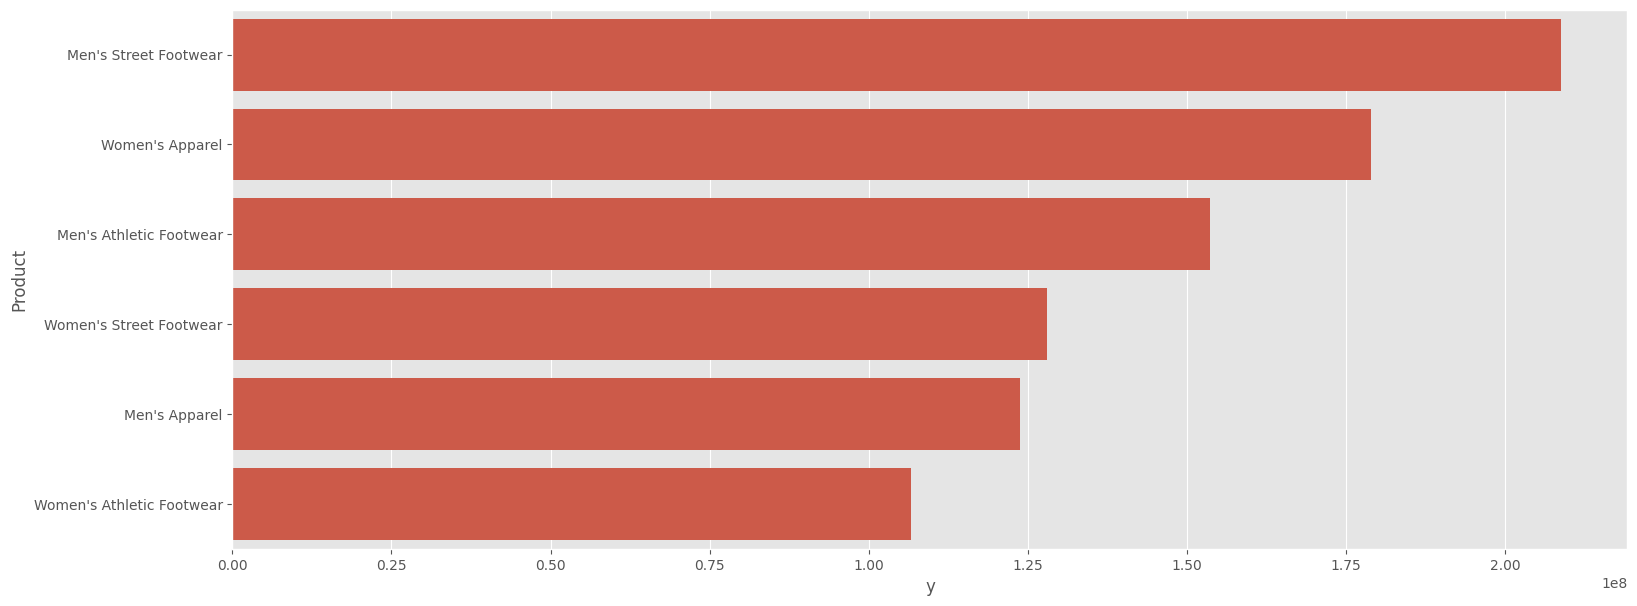

In [11]:
# TOP SELLING PRODUCTS

top_selling_products = df.groupby('Product')['y'].sum().sort_values(ascending=False).reset_index()
top_selling_products.index+=1
sns.barplot(data=top_selling_products,y='Product',x='y')

Observaciones

- La categoría más vendida es el calzado de calle para hombre, seguida de la indumentaria para mujer.
- Calzado deportivo masculino ocupa el 3er lugar.
- El calzado deportivo femenino ocupa el último lugar.

<Axes: xlabel='Operating Profit', ylabel='City'>

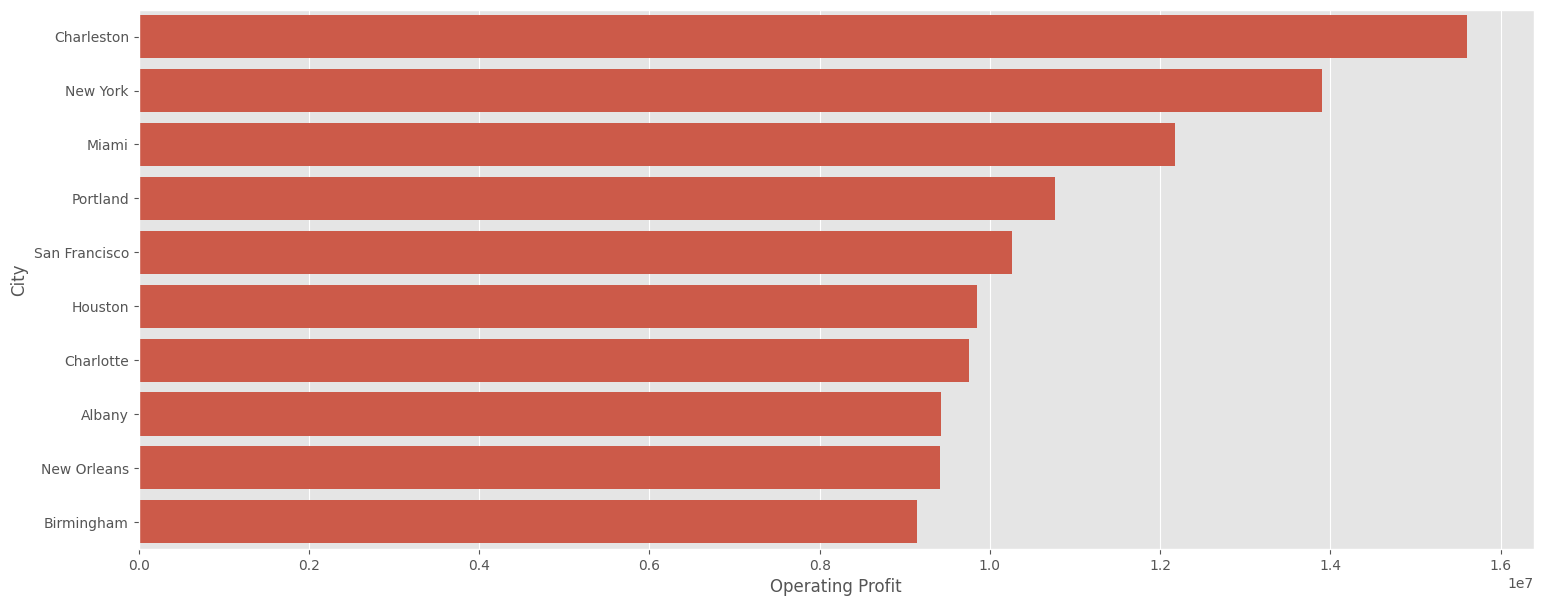

In [12]:
# TOP CITIES

grossing_cities = df.groupby('City')['Operating Profit'].sum().sort_values(ascending=False).reset_index().head(10)
grossing_cities.index+=1
sns.barplot(data=grossing_cities,y='City',x='Operating Profit')

### **Top and Bottom Selling State and City**

In [13]:
df['City_State'] = df['City'] + ', ' + df['State'] #Considering city names alone does not make sense, as some states have common city names.

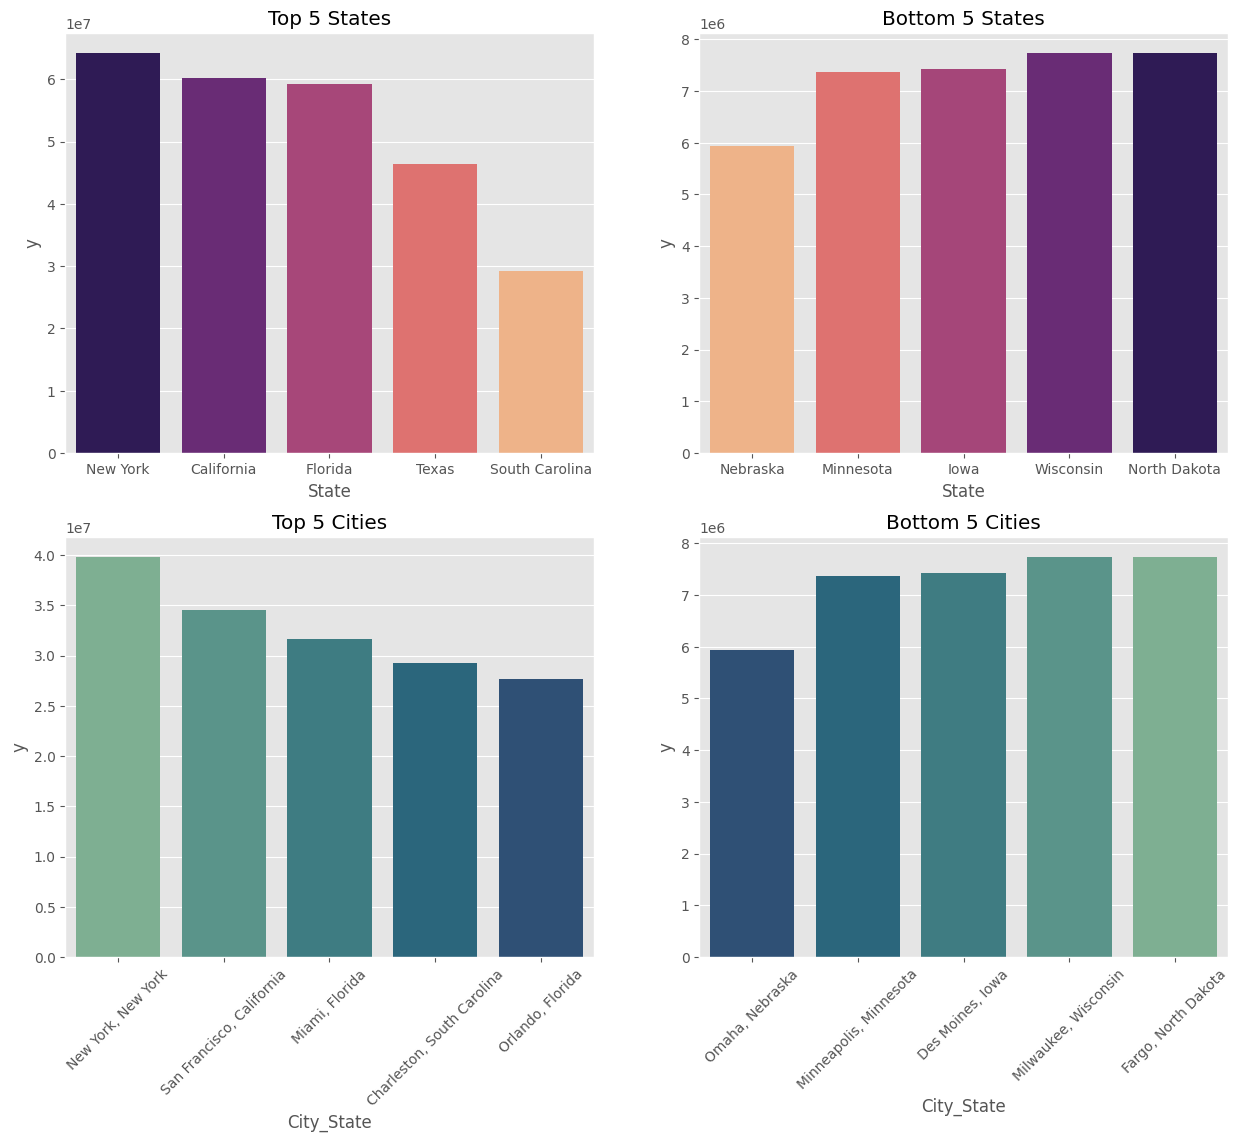

In [14]:
top_states = df.groupby('State')['y'].sum().nlargest(5).reset_index()
bottom_states = df.groupby('State')['y'].sum().nsmallest(5).reset_index()

top_cities = df.groupby('City_State')['y'].sum().nlargest(5).reset_index()
bottom_cities = df.groupby('City_State')['y'].sum().nsmallest(5).reset_index()

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 12))

sns.barplot(x='State', y='y', data=top_states,palette='magma', ax=axes[0, 0])
axes[0, 0].set_title('Top 5 States')
axes[0, 0].tick_params(axis='x', )

sns.barplot(x='State', y='y', data=bottom_states,palette='magma_r', ax=axes[0, 1])
axes[0, 1].set_title('Bottom 5 States')
axes[0, 1].tick_params(axis='x', )

sns.barplot(x='City_State', y='y', data=top_cities,palette='crest', ax=axes[1, 0])
axes[1, 0].set_title('Top 5 Cities')
axes[1, 0].tick_params(axis='x', rotation=45) 

sns.barplot(x='City_State', y='y', data=bottom_cities, palette='crest_r' , ax=axes[1, 1])
axes[1, 1].set_title('Bottom 5 Cities')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.show()

Observaciones

- El estado de Nueva York ocupa el primer lugar con unas ventas totales de 64,22 millones de dólares.
- California y Florida tienen una reñida competencia por el segundo lugar.
- Nebraska es el estado que menos vende con 5,92 millones de dólares.
- Mientras que los otros 4 estados (Minnesota, Iowa, Wisconsin, Dakota del Norte) que se encuentran entre los 5 últimos tienen unas ventas de alrededor de 7 millones de dólares.
- La ciudad de Nueva York ocupa el primer lugar con unas ventas de 39,80 millones de dólares, seguida de San Francisco con unas ventas de 34,53 millones de dólares.
- Omaha es la ciudad que menos vende con 5,92 millones de dólares seguida de Minneapolis, Des Moines, Milwaukee y Fargo.

### **Sales Method by Total Sales**

In [15]:
sales_method_pie = df.groupby('Sales Method')['y'].sum().reset_index()
colors = ['#99FFDE', '#ffde99', '#de99ff']

px.pie(sales_method_pie, values='y', names='Sales Method', title='Sales Method by Total Sales', hole=0.4,color_discrete_sequence=colors)

Observaciones

- La mayoría, el 39,6% de las ventas, son en tienda, seguidas por Outlet con un 32,8% y Online con un 27,5%.

### **Price Per Product Distribution**

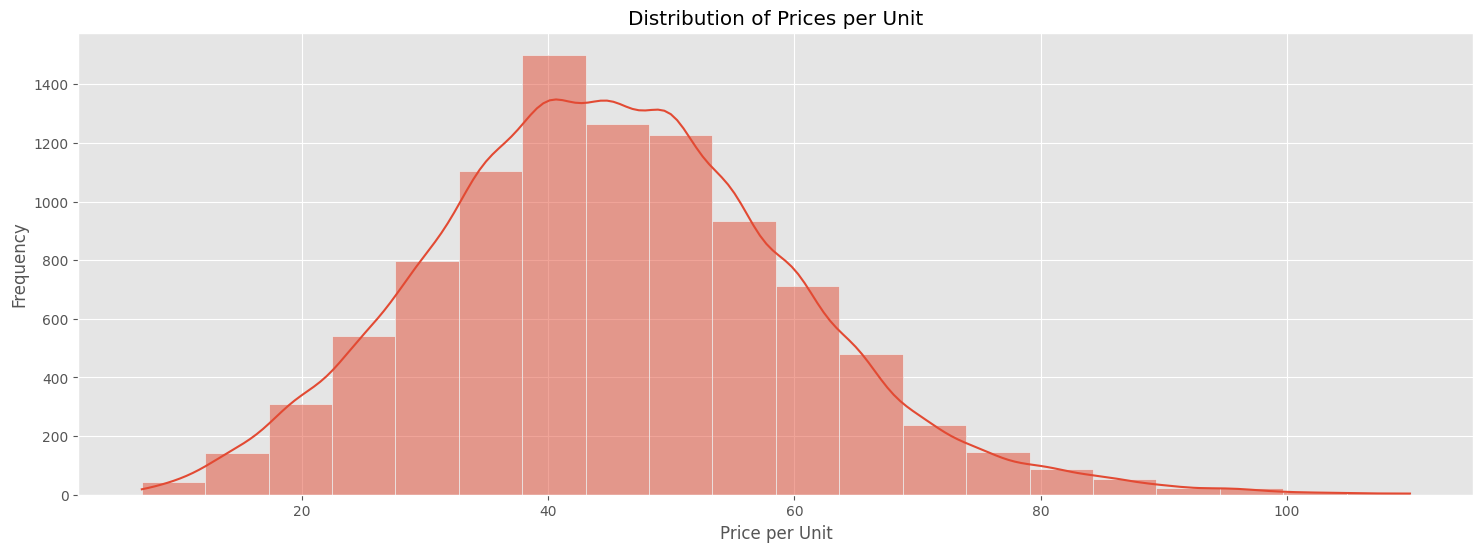

In [16]:
plt.figure(figsize=(18, 6))
sns.histplot(df['Price per Unit'], bins = 20, kde = True)
plt.title('Distribution of Prices per Unit')
plt.xlabel('Price per Unit')
plt.ylabel('Frequency')
plt.show()

Observaciones

- El precio por unidad sigue una distribución normal. Su punto máximo es de 40 dólares, lo que significa que el precio de 40 dólares es el más común.
- La mayoría de los productos tienen precios entre 20 dólares y 80 dólares.

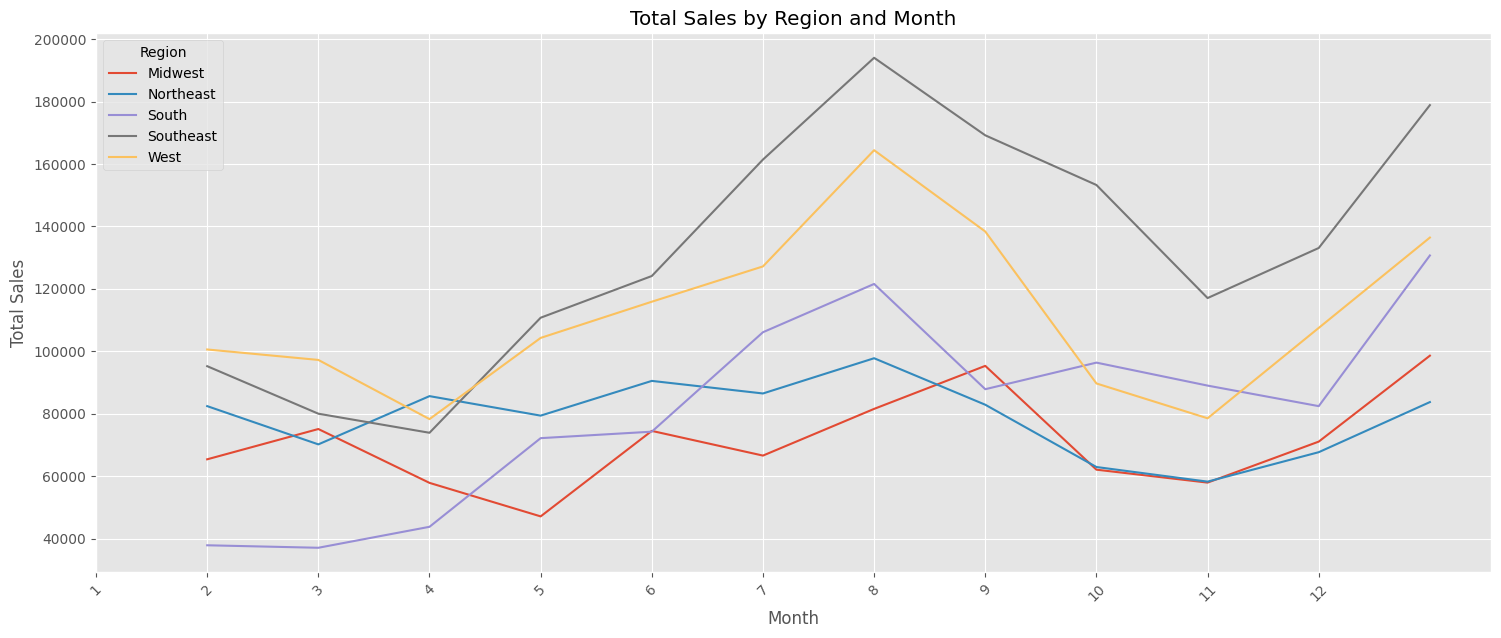

In [17]:
adidas_southeast = df.pivot_table(values='y', index='Month', columns='Region', fill_value=0)

# Define the order of months
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Reindex the pivot table with the defined month order
#adidas_southeast = adidas_southeast.reindex(month_order)

# Plotting the pivot table
adidas_southeast.plot.line()
plt.xticks(range(len(adidas_southeast.index)), adidas_southeast.index)

# Adding labels and title
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Total Sales by Region and Month')
plt.xticks(rotation=45)
# Display the plot
plt.show()

- Tenemos un aumento de Ventas en épocas de Verano y cercanas a las Vacaciones de Navidad.
- Tenemos dos regiones con un rendimiento excelente, dos con un rendimiento inferior y también una con un rendimiento medio.

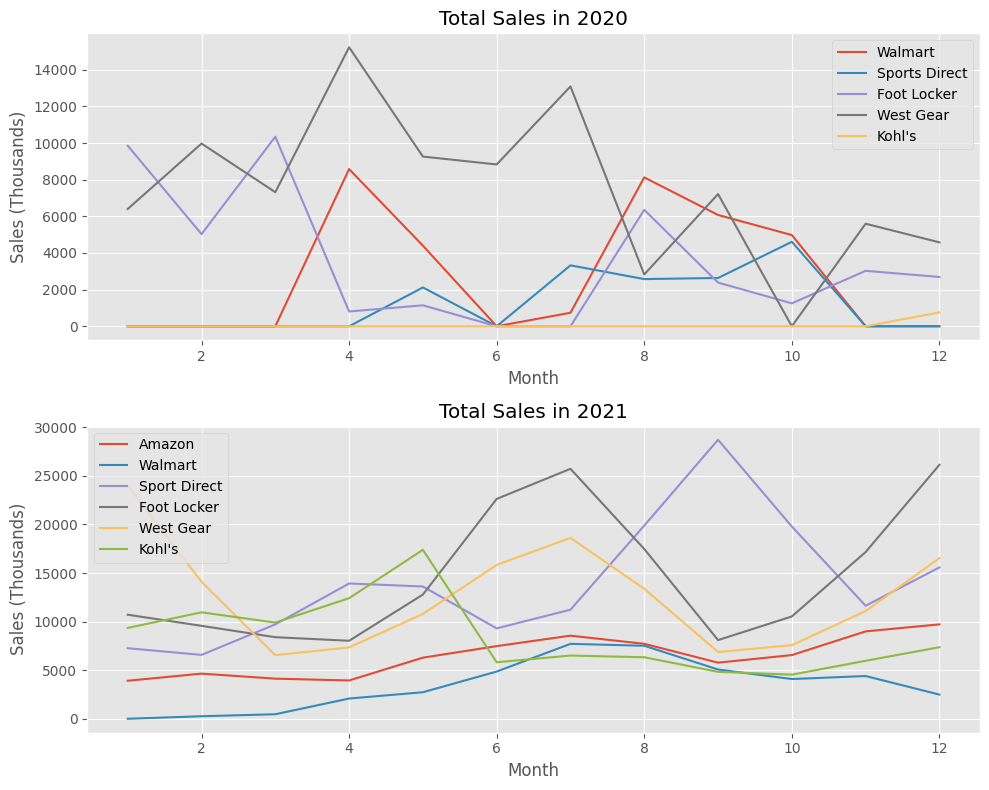

In [18]:
adidas_2020=df[df['Year']==2020]
adidas_2021=df[df['Year']==2021]

adidas_retailer_2020=pd.pivot_table(adidas_2020,values='y',index=['Month'],columns='Retailer', aggfunc=np.sum,fill_value=0)
adidas_retailer_Thousands_2020=(adidas_retailer_2020/1000).round(2)

adidas_retailer_2021=pd.pivot_table(adidas_2021,values='y',index=['Month'],columns='Retailer', aggfunc=np.sum,fill_value=0)
adidas_retailer_Thousands_2021=(adidas_retailer_2021/1000).round(2)

adidas_retailer_Thousands_2020=adidas_retailer_Thousands_2020
adidas_retailer_Thousands_2021=adidas_retailer_Thousands_2021
fig, axes = plt.subplots(2, 1, figsize=(10, 8))

axes[0].plot(adidas_retailer_Thousands_2020.index, adidas_retailer_Thousands_2020[['Walmart','Sports Direct','Foot Locker','West Gear']], 
             label=['Walmart','Sports Direct','Foot Locker','West Gear'])
axes[0].plot(adidas_retailer_Thousands_2020.index, adidas_retailer_Thousands_2020["Kohl's"], label="Kohl's")
# Add more lines for other retailers as needed
axes[0].set_title('Total Sales in 2020')
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Sales (Thousands)')
axes[0].legend()

axes[1].plot(adidas_retailer_Thousands_2021.index, adidas_retailer_Thousands_2021[['Amazon','Walmart','Sports Direct','Foot Locker','West Gear']], 
             label=['Amazon','Walmart','Sport Direct','Foot Locker','West Gear'])
axes[1].plot(adidas_retailer_Thousands_2021.index, adidas_retailer_Thousands_2021["Kohl's"], label="Kohl's")
# Add more lines for other retailers as needed
axes[1].set_title('Total Sales in 2021')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Sales (Thousands)')
axes[1].legend()

plt.tight_layout()
plt.show()

Para 2021

1. De nuestra observación podemos ver que la mayoría de las rebajas de verano aparecieron en "Foot Locker" y "West Gear".

2. Pero al mismo tiempo tenemos valores atípicos como "Sport Direct", que tuvo un aumento en las ventas en septiembre, mientras que otros minoristas tuvieron una disminución en las ventas.

3. También tenemos "West Gear", otro caso atípico que tiene buenas ventas en enero.

En 2020 no tenemos muchos datos para hacer un análisis de ventas estacional adecuado de todos los minoristas, pero con lo que tenemos "West Gear" líder en ventas en verano y abril (creo que fue en tiempos de bloqueo).

Es suficiente para el análisis regional y de minoristas para una comprensión básica del desempeño de las tendencias en las regiones y qué temporada y minorista tienen mejor desempeño en qué mes.

### **We found top Sales Product in Adidas company for last two years**

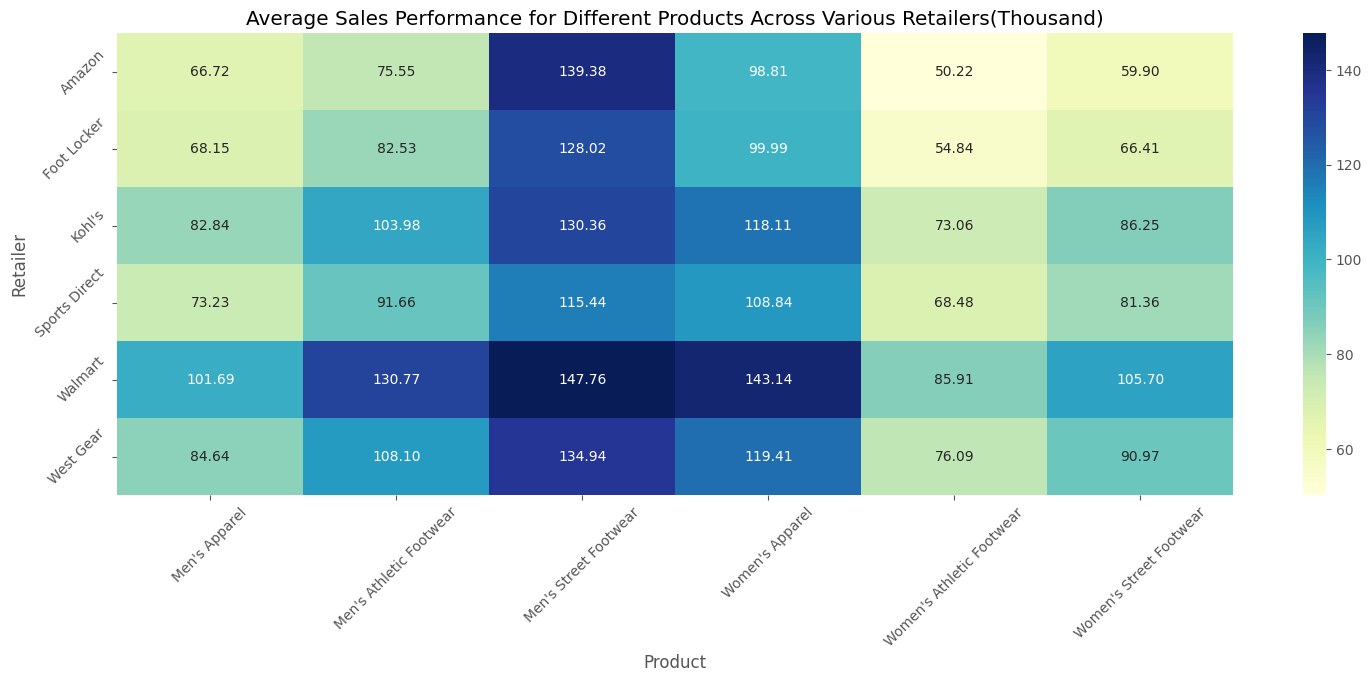

In [19]:
adidas_product_retailer_k=(df.pivot_table(values='y',index='Retailer',columns='Product',aggfunc=np.mean)/1000).round(2)

# Create heatmap
plt.figure(figsize=(18, 6))  # Adjust the figure size if needed
sns.heatmap(adidas_product_retailer_k, annot=True, fmt=".2f", cmap="YlGnBu")

# Set plot title and labels
plt.title("Average Sales Performance for Different Products Across Various Retailers(Thousand)")
plt.xlabel("Product")
plt.ylabel("Retailer")
plt.xticks(rotation=45)
plt.yticks(rotation=45)
# Show the plot
plt.show()

1. Producto más vendido en promedio (Calzado de Calle Hombre) en todos nuestros comercios

2. Además, Walmart tiene un buen desempeño en la venta de todos nuestros productos en promedio.

3. Hay tres tipos de productos promedio más vendidos en todos nuestros minoristas y sus (calzado de calle para hombres, ropa de mujer, calzado deportivo para hombres).

### **Monthly Total Sales Over Years**

In [20]:
yearly_sales = df.groupby(['Year','Month'])['y'].sum().reset_index()

In [ ]:
px.line(yearly_sales, x='Month', y='y', color='Year',title='Monthly Total Sales Over Years', markers=True, template= "none")

In [ ]:
df.groupby('Year')['y'].sum().reset_index()

Observaciones

Las ventas han mostrado un crecimiento significativo de 2020 a 2021.

2021

- Hubo una caída en las ventas durante marzo, seguida de un aumento que alcanzó su punto máximo en julio, una caída en agosto y otro aumento a partir de noviembre.
- El mes de julio tuvo las mayores ventas con 78,33 millones de dólares.
- En términos de ventas, marzo generó los menores ingresos de 39,14 millones de dólares.
- Ventas Totales 717,82 millones de dólares

2020

- Hubo un aumento en las ventas en abril, seguido de una disminución y caída en junio, otro aumento y caída en octubre y un mínimo histórico en diciembre.
- El mes de abril tuvo las mayores ventas con 24,60 millones de dólares.
- En términos de ventas, diciembre generó los menores ingresos de 8,02 millones de dólares.
- Ventas Totales 182.08 millones de dólares

### **Monthly Total Profit Over Years**

In [21]:
yearly_profit = df.groupby(['Year','Month'])['Operating Profit'].sum().reset_index()

In [22]:
px.line(yearly_profit, x='Month', y='Operating Profit', color='Year',title='Monthly Total Profit Over Years', markers=True, template= "simple_white")

In [23]:
pd.options.display.float_format = '{:.0f}'.format

df.groupby('Year').agg({"Operating Profit" : "sum"})

,Operating Profit
Year,
2020,63375710
2021,268759412


Observaciones

Las ganancias han mostrado un crecimiento significativo de 2020 a 2021.

2021

- Hubo una caída en las ganancias durante marzo, seguida de un aumento que alcanzó su punto máximo en julio, una caída en agosto y otro aumento a partir de noviembre.
- El mes de julio tuvo la mayor ganancia con 29,13 millones de dólares.
- En términos de beneficio, marzo generó el menor beneficio de 14,57 millones de dólares.
- Beneficio total 268,75 millones de dólares.

2020

- Hubo un aumento de los beneficios en abril, seguido de una caída y una caída en junio, otra subida y una caída en octubre y un mínimo histórico en diciembre.
- El mes de abril tuvo la mayor ganancia con 9,30 millones de dólares.
- En términos de beneficio, junio generó el menor beneficio de 2,29 millones de dólares.
- Beneficio total 63,37 millones de dólares.

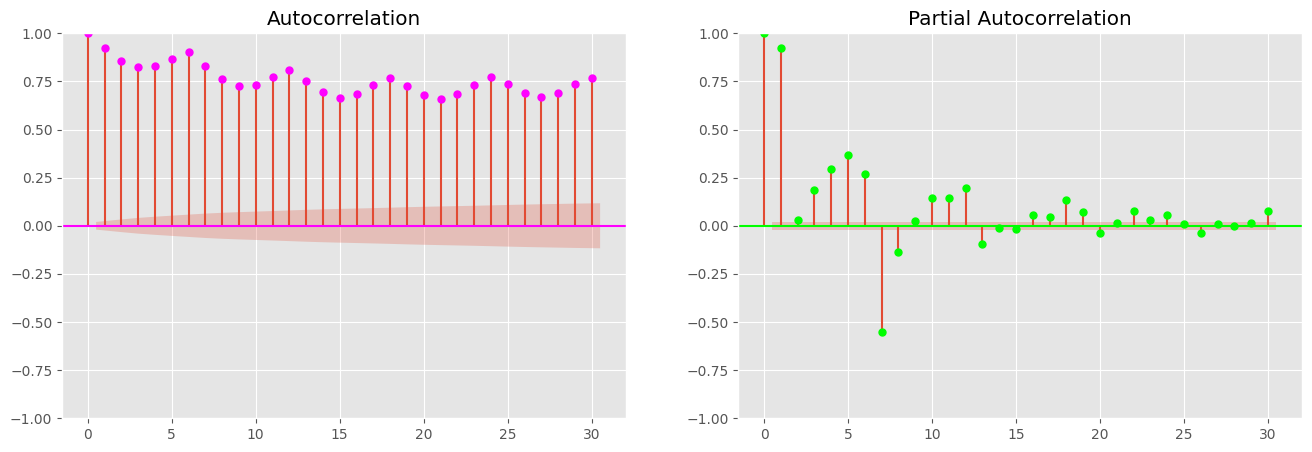

In [24]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(16, 5))

plot_acf(df["y"],  lags=30, ax=axs[0],color="fuchsia")
axs[0].set_title("Autocorrelation");

# Grafico
plot_pacf(df["y"],  lags=30, ax=axs[1],color="lime")
axs[1].set_title('Partial Autocorrelation')
plt.show()

<a id="4"></a>
# **Split the data into training and testing**

Let's divide our data into two parts:

1. Data to train the model.
2. Data to test the model, here we will use the last 30 daily.

In [25]:
data=df.groupby("ds")[["y"]].sum().reset_index()
data["unique_id"]="1"
#data=data.tail(400)

In [26]:
train = data[data.ds<='2021-12-01'] 
test=data[(data['ds'] > '2021-12-01')]

train.shape, test.shape

((694, 3), (30, 3))

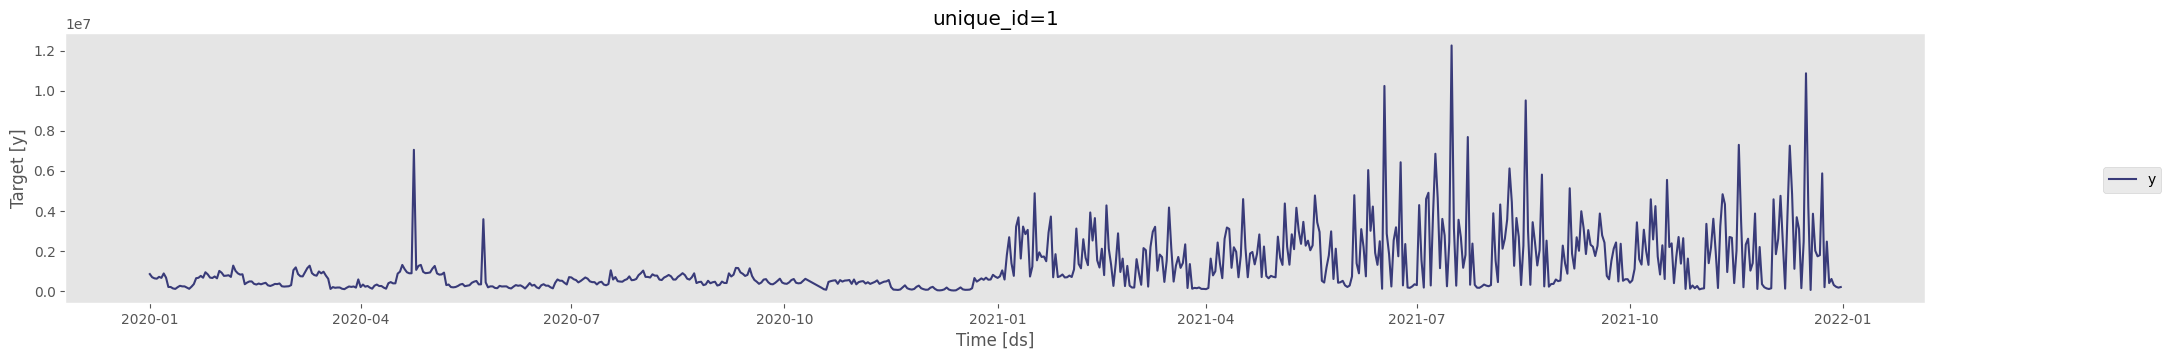

In [27]:
StatsForecast.plot(train, test)

<a id="5"></a>
# **Implementation with StatsForecast**

We are going to train the `Seasonal Exponential Smoothing Optimized` model, using the `SeasonalExponentialSmoothingOptimized` function. This model will help us forecast user demand in the next 12 month.

In [28]:
from statsforecast import StatsForecast
from statsforecast.models import  AutoARIMA, SeasonalNaive, AutoETS

In [30]:
season_length = 7 # weekly data 
horizon = len(test) # number of predictions

# We call the model that we are going to use
models = [AutoARIMA(season_length=season_length),
          AutoETS(season_length=season_length),
          SeasonalNaive(season_length=season_length)]

In [31]:
# Instantiate StatsForecast class as sf
sf = StatsForecast(
    df=train,
    models=models,
    freq='D', 
    n_jobs=-1)

## **Fit the Model**

In [32]:
sf.fit()

StatsForecast(models=[AutoARIMA,AutoETS,SeasonalNaive])

## **Predict Method**
We will use the predict method to forecast the last 30 days for the sale total of Adidas. This method only has one parameter, the forecast horizon.

In [33]:
Y_hat = sf.predict(horizon)
Y_hat

,ds,AutoARIMA,AutoETS,SeasonalNaive
unique_id,,,,
1,2021-12-02,139780,1120196,102264
1,2021-12-03,1161099,1044643,2196503
1,2021-12-04,307029,1129871,342275
1,2021-12-05,502141,1034063,189405
1,2021-12-06,634376,1044621,129855
1,2021-12-07,676808,1141906,100678
1,2021-12-08,769302,1075579,137040
1,2021-12-09,838809,1120196,102264
1,2021-12-10,1295376,1044643,2196503


## **Forecasting Plot**

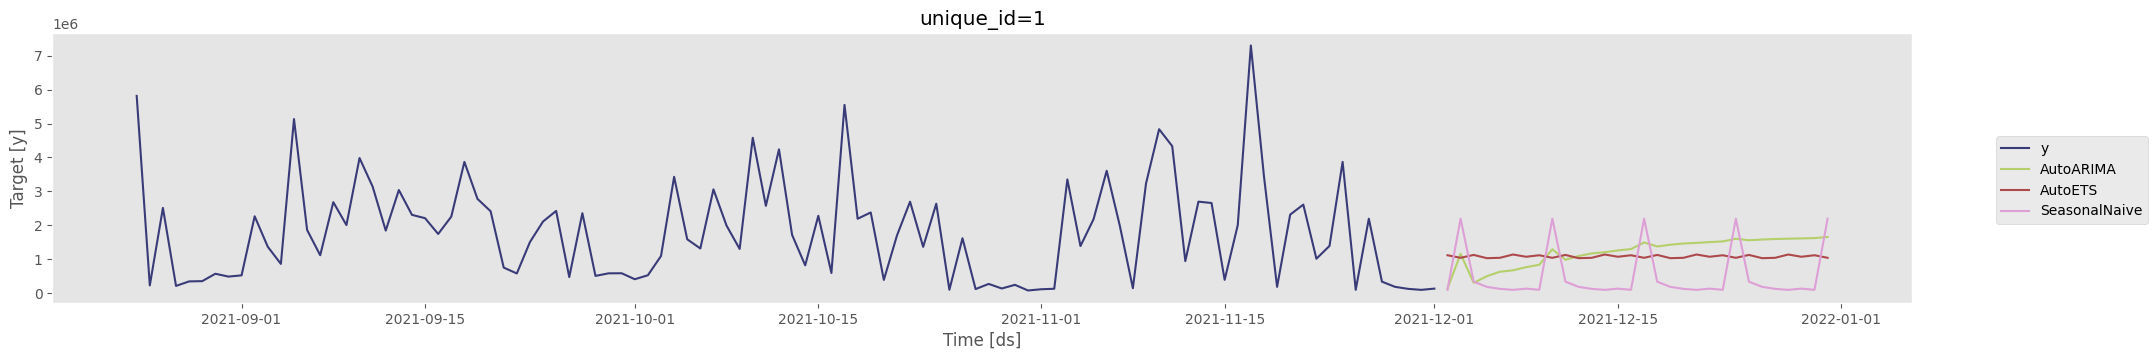

In [34]:
sf.plot(train, Y_hat, max_insample_length=100)

<a id="6"></a>
# **Evaluate the model**

In [35]:
from datasetsforecast.losses import (mae, mape, mase, rmse, smape)
from utilsforecast.evaluation import evaluate

In [36]:
def evaluate_performace(y_hist, y_true, y_pred, models):
    y_true = pd.merge(y_true,y_pred, how='left', on=['ds'])
    evaluation = {}
    for model in models:
        evaluation[model] = {}
        for metric in [mase, mae, mape, rmse, smape]:
            metric_name = metric.__name__
            if metric_name == 'mase':
                evaluation[model][metric_name] = metric(y_true['y'].values,
                                                 y_true[model].values,
                                                 y_hist['y'].values, seasonality=24)
            else:
                evaluation[model][metric_name] = metric(y_true['y'].values, y_true[model].values)
    return pd.DataFrame(evaluation).T

In [37]:
evaluate_performace(train, test,Y_hat.reset_index() , models=["AutoARIMA","AutoETS", "SeasonalNaive"])

,mase,mae,mape,rmse,smape
AutoARIMA,2,2184492,295,2955801,113
AutoETS,2,2075584,240,2887081,107
SeasonalNaive,2,2396269,154,3360347,135


<a id="7"></a>
# **Variables exógenas**
Vamos a seleccionar las variables exógenas que entrarán en nuestro modelo, para ello es necesario tener dos conjuntos de datos:

1. Los datos de entrenamiento: estos datos contendrán todas las variables exógenas que vamos a agregar a nuestro modelo más las variables objetivo.
2. Datos con variables exógenas: seleccionamos las variables que queremos agregar a nuestro modelo, pero este conjunto de datos no contiene la variable objetivo.

Carguemos los datos... y veremos!!!

In [38]:
df_exo=df.groupby("ds")[["y",'Units Sold','Operating Profit','Total Cost']].sum().reset_index()
df_exo["unique_id"]="1"
df_exo

,ds,y,Units Sold,Operating Profit,Total Cost,unique_id
0,2020-01-01,845141,2361,382132,463009,1
1,2020-01-02,689410,2310,225947,463463,1
2,2020-01-03,632573,2302,202279,430294,1
3,2020-01-04,615080,2085,228235,386845,1
4,2020-01-05,707829,1917,222392,485437,1
...,...,...,...,...,...,...
719,2021-12-27,602353,1314,282960,319393,1
720,2021-12-28,301010,749,106359,194651,1
721,2021-12-29,211109,557,85281,125828,1
722,2021-12-30,167903,442,62110,105793,1


In [39]:
exogen=df_exo[["ds","unique_id", 'Units Sold','Operating Profit','Total Cost']]
exogen

,ds,unique_id,Units Sold,Operating Profit,Total Cost
0,2020-01-01,1,2361,382132,463009
1,2020-01-02,1,2310,225947,463463
2,2020-01-03,1,2302,202279,430294
3,2020-01-04,1,2085,228235,386845
4,2020-01-05,1,1917,222392,485437
...,...,...,...,...,...
719,2021-12-27,1,1314,282960,319393
720,2021-12-28,1,749,106359,194651
721,2021-12-29,1,557,85281,125828
722,2021-12-30,1,442,62110,105793


# **Splitting training and test data with exogenous variables**
<a id="8"></a>
Let's divide our data into sets
1. Data to train our model
2. Data to test our model

For the test data we will use the last 8 weekly to test and evaluate the performance of our model.

In [40]:
train_exo = df_exo[df_exo.ds<='2021-12-01'] 
test_exo=exogen[(exogen['ds'] > '2021-12-01')]

train_exo.shape, test_exo.shape

((694, 6), (30, 5))

<a id="9"></a>
# **Implementation of StatsForecast with exogenous variables**

In [41]:
season_length = 7 # weekly data 
horizon = len(test) # number of predictions

# We call the model that we are going to use
models_exo = [AutoARIMA(season_length=season_length),
          AutoETS(season_length=season_length),
          SeasonalNaive(season_length=season_length)]

In [42]:
# Instantiate StatsForecast class as sf
sf_exo = StatsForecast(
    models=models_exo,
    freq='D', 
    n_jobs=-1)

## **Fit model with exogenous variables**

The fit method has two parameters:

* Training data with exogenous variables.
* Data with only exogenous variables.

In [44]:
sf_exo.fit(train_exo)

StatsForecast(models=[AutoARIMA,AutoETS,SeasonalNaive])

## **Predict Method**

The predict method takes only 2 parameters

* The Horizon: amount of data you want to predict.
* Exogenous variables without the target variable.

In [45]:
Y_hat_exo=sf_exo.predict(h=horizon,  X_df=test_exo) 
Y_hat_exo

,ds,AutoARIMA,AutoETS,SeasonalNaive
unique_id,,,,
1,2021-12-02,4579102,1120196,102264
1,2021-12-03,1839221,1044643,2196503
1,2021-12-04,2608665,1129871,342275
1,2021-12-05,4753796,1034063,189405
1,2021-12-06,2460557,1044621,129855
1,2021-12-07,119040,1141906,100678
1,2021-12-08,3780923,1075579,137040
1,2021-12-09,7257917,1120196,102264
1,2021-12-10,4838975,1044643,2196503


## **Forecasting Plot**

In [46]:
actual_exo=df_exo[df_exo.ds>'2021-12-01'] 

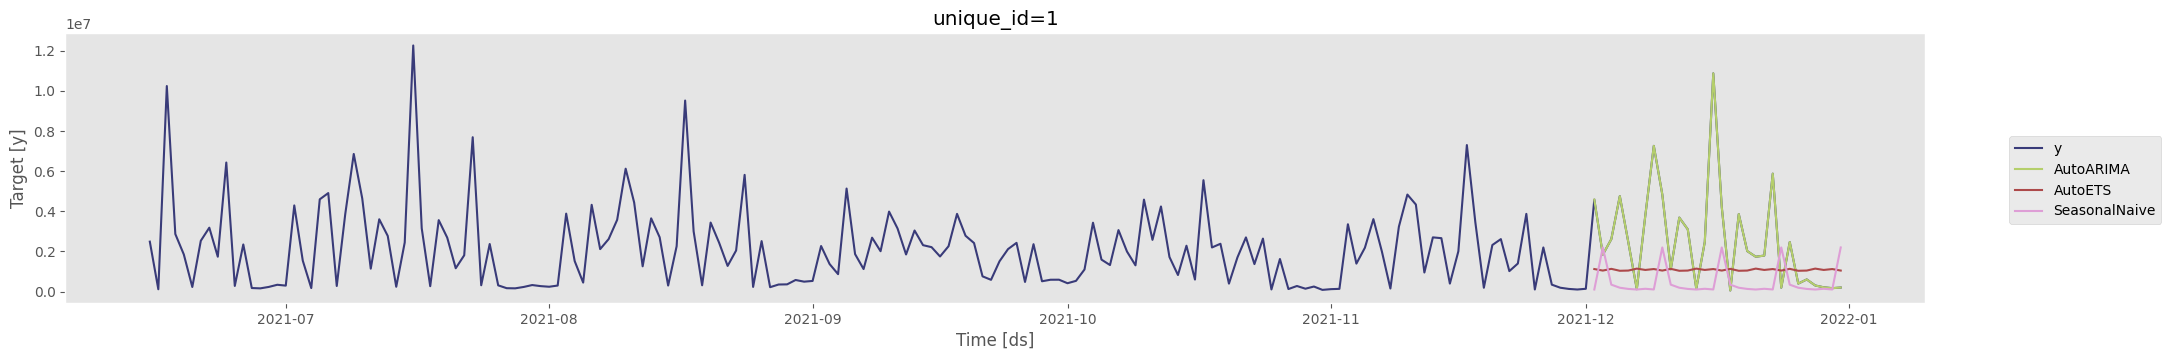

In [51]:
sf.plot(df_exo, Y_hat_exo.reset_index(), max_insample_length=200)

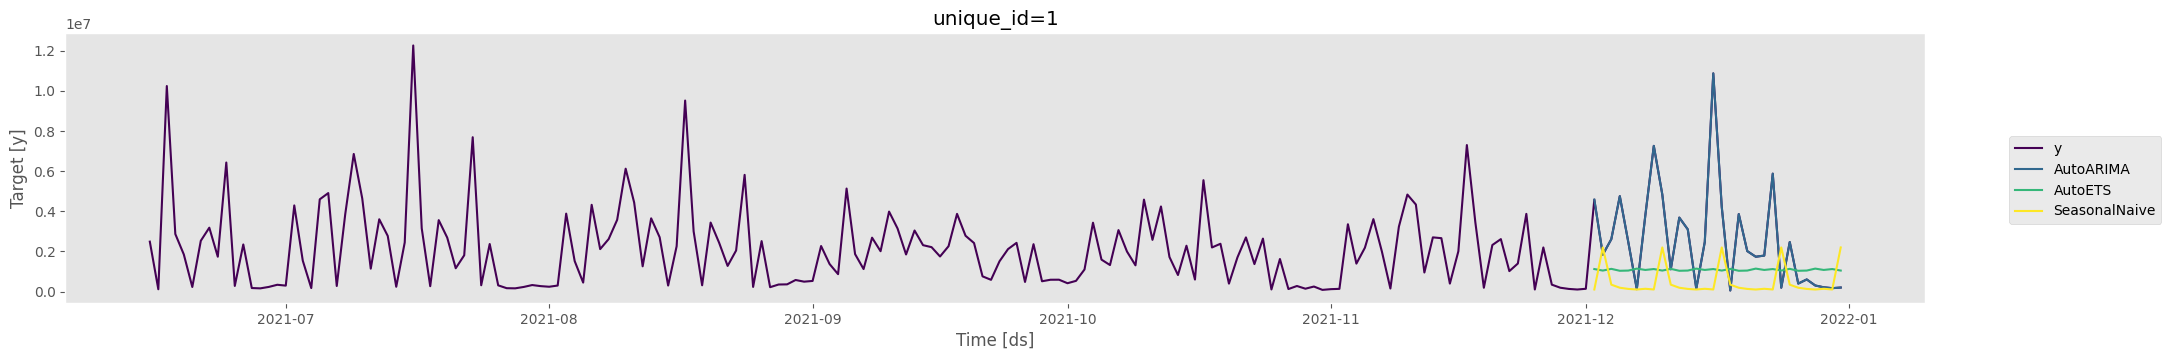

In [53]:
plot_series(df_exo, Y_hat_exo.reset_index(), max_insample_length=200)

<a id="10"></a>
# **Evaluate the model for exogenous variables**

In [48]:
print("With exogenous variable")
print(evaluate_performace(train_exo, actual_exo,Y_hat_exo.reset_index() , models=["AutoARIMA","AutoETS", "SeasonalNaive"]))
print("======"*10)
print("No exogenous variable")
print(evaluate_performace(train, test,Y_hat.reset_index() , models=["AutoARIMA","AutoETS", "SeasonalNaive"]))

With exogenous variable
               mase     mae  mape    rmse  smape
AutoARIMA         0       0     0       0      0
AutoETS           2 2075584   240 2887081    107
SeasonalNaive     2 2396269   154 3360347    135
No exogenous variable
               mase     mae  mape    rmse  smape
AutoARIMA         2 2184492   295 2955801    113
AutoETS           2 2075584   240 2887081    107
SeasonalNaive     2 2396269   154 3360347    135


<a id="11"></a>
# **Conclusion**

Análisis del pronóstico de ventas de ADIDAS:

En el análisis se proporcionaron los resultados de tres modelos utilizados para pronosticar las ventas de ADIDAS, con y sin variable exógena. Los modelos evaluados son AutoARIMA, AutoETS y SeasonalNaive. A continuación, se analizarán los resultados en términos de diferentes métricas de evaluación del pronóstico.

Con variable exógena:
- AutoARIMA: Los resultados indican un rendimiento perfecto para todas las métricas evaluadas (mase, mae, mape, rmse y smape), lo que sugiere que este modelo ajusta muy bien los datos de ventas de ADIDAS y proporciona pronósticos precisos.
- AutoETS: Aunque este modelo muestra un rendimiento inferior al AutoARIMA, aún ofrece resultados aceptables. Sin embargo, las métricas de mae, rmse y smape indican un mayor error en comparación con AutoARIMA.
- SeasonalNaive: Este modelo muestra un rendimiento similar al AutoETS, con resultados ligeramente peores en todas las métricas. El mape indica que este modelo tiene el menor error porcentual absoluto medio.

Sin variable exógena:
- AutoARIMA: En comparación con el modelo con variable exógena, el rendimiento de AutoARIMA empeora en todas las métricas. El mae, rmse y smape indican un mayor error en este caso.
- AutoETS: Los resultados son idénticos a los obtenidos con variable exógena, lo que sugiere que la falta de una variable adicional no afecta significativamente el rendimiento de este modelo.
- SeasonalNaive: Al igual que AutoETS, los resultados no muestran cambios significativos en comparación con el modelo con variable exógena.

En general, los resultados indican que el modelo AutoARIMA con variable exógena ofrece el mejor rendimiento en términos de pronóstico de ventas de ADIDAS, ya que muestra el menor error y las mejores métricas de evaluación en comparación con los otros modelos evaluados. Sin embargo, AutoETS y SeasonalNaive también proporcionan resultados aceptables, especialmente cuando se utiliza una variable exógena. Es importante tener en cuenta que el análisis se basa únicamente en los resultados presentados y no se dispone de información adicional sobre los datos o la metodología utilizada en cada modelo.

<a id="12"></a>
# **References**

1. [Arima Model](https://nixtla.github.io/statsforecast/docs/models/autoarima.html)
2. [Automatic Forecasting](https://nixtla.github.io/statsforecast/src/core/models.html)
3. [Exponential smoothing](https://nixtla.github.io/statsforecast/docs/models/autoets.html#table-of-contents)
4. [Panda’s available frequencies](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases)
5. [Seasonal periods](https://robjhyndman.com/hyndsight/seasonal-periods/)
6. [Rob J. Hyndman and George Athanasopoulos (2018). “Forecasting principles and practice, Time series cross-validation”](https://otexts.com/fpp3/tscv.html)

